In [13]:
# importing the dependencies
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')


from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.metrics import roc_auc_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve,learning_curve

In [14]:
# get the data
# Loading the dataset
df = pd.read_pickle('../DataFrames/all_data_one_hot_data.pkl')

In [15]:
# seperating only the train set
train_set,test_set =  df.iloc[:28322],df.iloc[28322:]

In [16]:
# Making X and y
X = train_set.drop(columns=['label','id'],axis=1)
y = train_set['label']

In [17]:
X.shape,y.shape

((28322, 53), (28322,))

In [18]:
X.head()

,s13,s48,n1,n2,n3,n4,n5,n6,n7,n8,...,s69_x,s69_~1,s70_op: A,s70_op: B,s70_op: C,s70_op: D,s71_a,s71_b,s71_c,s71_d
0,1,0,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,...,1,0,0,0,0,1,0,1,0,0
1,1,1,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,...,1,0,0,0,0,1,0,1,0,0
2,1,0,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,...,1,0,0,0,0,1,0,1,0,0
3,1,0,5.749840,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,1.485863,...,1,0,0,0,0,1,0,1,0,0
4,1,1,14.771959,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,1.619210,...,0,1,0,0,0,1,0,0,0,1


In [19]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: label, dtype: float64

In [20]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.3,random_state=42,shuffle=True
)

In [21]:
# skf and rf
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
rfc = RandomForestClassifier(random_state=42,n_jobs=-1)

In [22]:
cross_val_score(rfc,X_train,y_train,cv=skf,scoring='roc_auc')

array([0.86877693, 0.86228182, 0.85982916, 0.84847029, 0.85306673])

In [23]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [24]:
# on train set
rfc_pred = rfc.predict(X_train)
roc_auc_score(y_train,rfc_pred)

1.0

In [25]:
rfc_pred = rfc.predict(X_test)
roc_auc_score(y_test,rfc_pred)

0.7215973315067246

Learning Curve

In [26]:
# Helper function
alphas = np.logspace(-2, 0, 20)
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

In [27]:
def plot_learning_curve():
    train_sizes = np.linspace(0.05,1,20)
    N_train,val_train,val_test = learning_curve(
        rfc,X_train,y_train,train_sizes=train_sizes,cv=skf,shuffle=True,scoring='roc_auc'
    )
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("AUC")
    plt.legend()
    plt.grid(True);

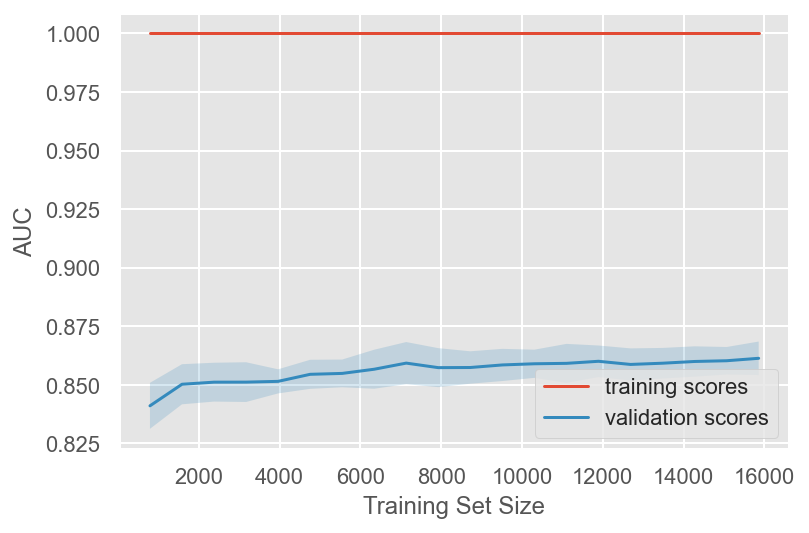

In [28]:
plot_learning_curve()

Validation Curves

In [29]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, "-", **kwargs)
    plt.fill_between(
        x,
        mu - std,
        mu + std,
        edgecolor="none",
        facecolor=lines[0].get_color(),
        alpha=0.2,
    )

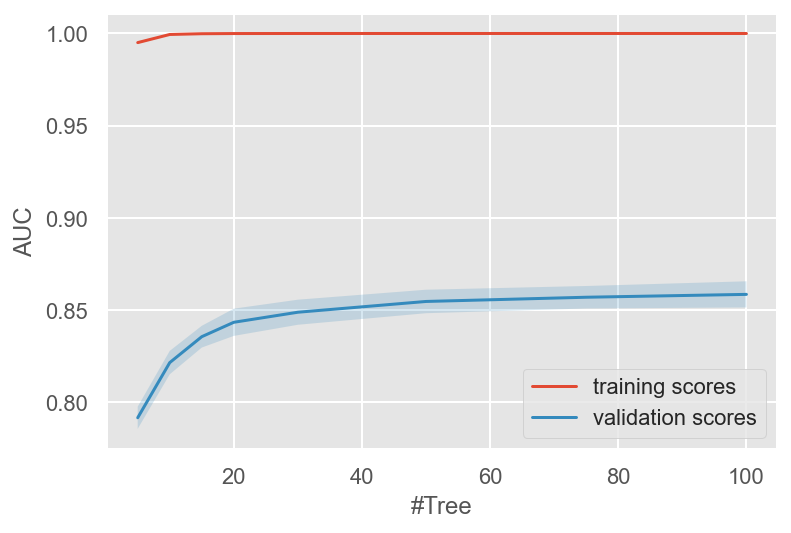

In [30]:
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='n_estimators',
    param_range=trees_grid,
    cv=skf,
    scoring="roc_auc"
)

plot_with_err(trees_grid, val_train, label="training scores")
plot_with_err(trees_grid, val_test, label="validation scores")
plt.xlabel("#Tree")
plt.ylabel("AUC")
plt.legend()
plt.grid(True);

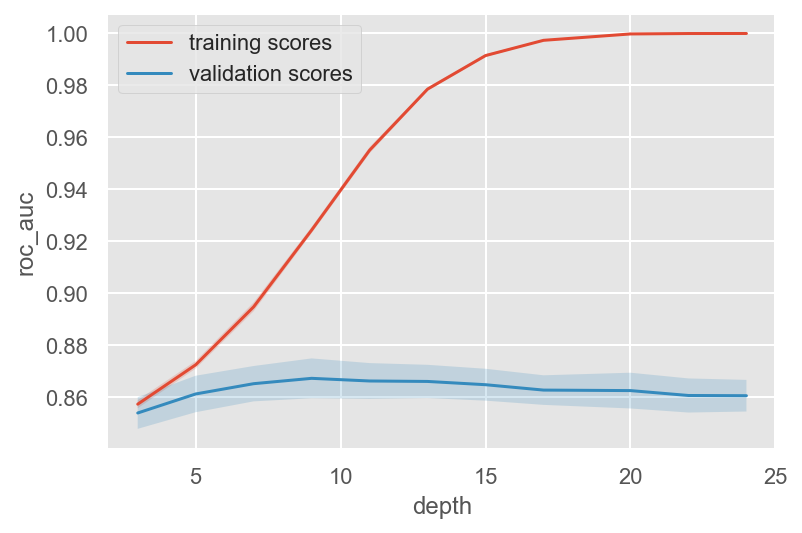

In [32]:
max_depth_grid = [3, 5, 7, 9, 11, 13, 15, 17, 20, 22, 24]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='max_depth',
    param_range=max_depth_grid,
    cv=skf,
    scoring="roc_auc"
)

plot_with_err(max_depth_grid, val_train, label="training scores")
plot_with_err(max_depth_grid, val_test, label="validation scores")
plt.xlabel("depth")
plt.ylabel("roc_auc")
plt.legend()
plt.grid(True);

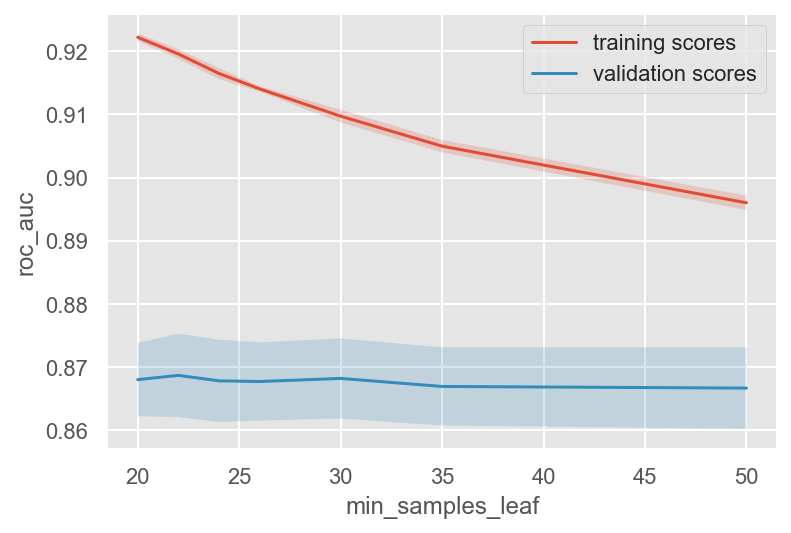

In [35]:
min_samples_leaf_grid = [20, 22, 24, 26,30,35,50]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='min_samples_leaf',
    param_range=min_samples_leaf_grid,
    cv=skf,
    scoring="roc_auc"
)

plot_with_err(min_samples_leaf_grid, val_train, label="training scores")
plot_with_err(min_samples_leaf_grid, val_test, label="validation scores")
plt.xlabel("min_samples_leaf")
plt.ylabel("roc_auc")
plt.legend()
plt.grid(True);

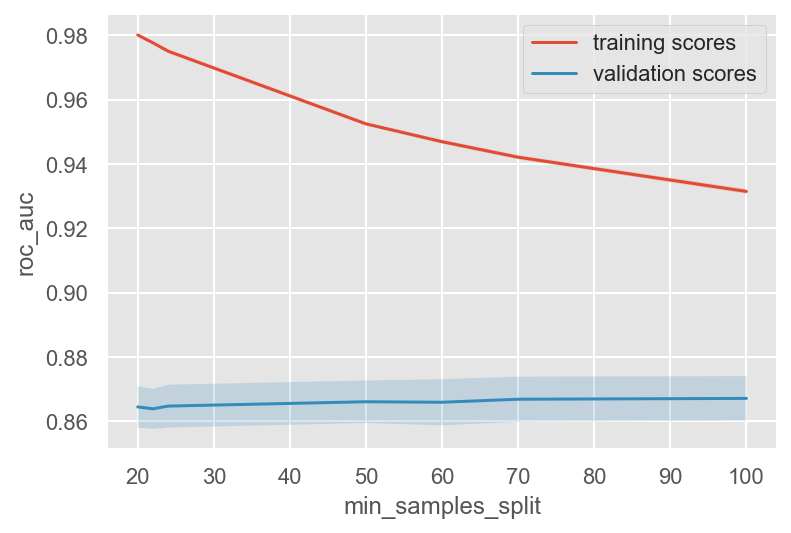

In [41]:
min_samples_split_grid = [ 20, 22, 24,50,60,70,100]
val_train, val_test = validation_curve(
    estimator=rfc,
    X=X_train,
    y=y_train,
    param_name='min_samples_split',
    param_range=min_samples_split_grid,
    cv=skf,
    scoring="roc_auc"
)

plot_with_err(min_samples_split_grid, val_train, label="training scores")
plot_with_err(min_samples_split_grid, val_test, label="validation scores")
plt.xlabel("min_samples_split")
plt.ylabel("roc_auc")
plt.legend()
plt.grid(True);

Hyperparameter Tuning

In [43]:
forest_params = {
    'max_depth':[1,2,3,4],
    'min_samples_leaf': np.arange(30,60,5),
    'min_samples_split': np.arange(70,100,6)
}

rfc = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
gcv = GridSearchCV(rfc,forest_params,n_jobs=-1,cv=skf,scoring='roc_auc',verbose=1)

In [44]:
gcv.fit(X_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': array([30, 35, 40, 45, 50, 55]),
                         'min_samples_split': array([70, 76, 82, 88, 94])},
             scoring='roc_auc', verbose=1)

In [45]:
gcv.best_score_

0.8583467539146543

In [46]:
gcv.best_estimator_

RandomForestClassifier(max_depth=4, min_samples_leaf=30, min_samples_split=94,
                       n_jobs=-1, random_state=42)

In [47]:
forest_pred = gcv.best_estimator_.predict(X_test)

In [48]:
roc_auc_score(y_test,forest_pred)

0.6828398829471035

In [49]:
def plot_learning_curve():
    train_sizes = np.linspace(0.05,1,20)
    N_train,val_train,val_test = learning_curve(
        gcv.best_estimator_,X_train,y_train,train_sizes=train_sizes,cv=skf,shuffle=True,scoring='roc_auc'
    )
    plot_with_err(N_train, val_train, label="training scores")
    plot_with_err(N_train, val_test, label="validation scores")
    plt.xlabel("Training Set Size")
    plt.ylabel("AUC")
    plt.legend()
    plt.grid(True);

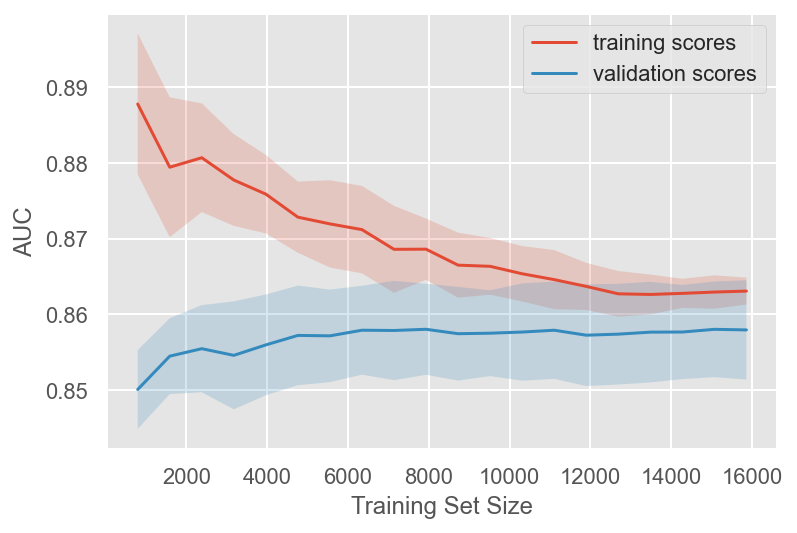

In [50]:
plot_learning_curve()

In [51]:
gcv.best_score_

0.8583467539146543

In [52]:
# Feature Importance
importances = gcv.best_estimator_.feature_importances_

In [54]:
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importance = pd.Series(importances,index=feature_names)

In [57]:
forest_importance.sort_values(ascending=False)

feature 24    0.190922
feature 44    0.153595
feature 26    0.111709
feature 43    0.100365
feature 37    0.075465
feature 36    0.069515
feature 50    0.054538
feature 32    0.048500
feature 6     0.024263
feature 1     0.018084
feature 52    0.013245
feature 19    0.012511
feature 7     0.011406
feature 20    0.010660
feature 2     0.009284
feature 29    0.008472
feature 3     0.008379
feature 18    0.008364
feature 9     0.008349
feature 17    0.007924
feature 51    0.006819
feature 33    0.006717
feature 30    0.006492
feature 34    0.005550
feature 48    0.004998
feature 47    0.004762
feature 0     0.004073
feature 8     0.002385
feature 5     0.001900
feature 4     0.001816
feature 11    0.001767
feature 35    0.001515
feature 10    0.001509
feature 46    0.001114
feature 25    0.000851
feature 28    0.000778
feature 15    0.000360
feature 12    0.000335
feature 41    0.000259
feature 38    0.000121
feature 42    0.000107
feature 22    0.000096
feature 16    0.000072
feature 14 